## Veri Görselleştirme 

Dağılım Grafikleri: Değişkenleri tek başına inceleme 
- Kategorik Değişkenler için; Sütun grafik (barplot) 
- Sayısal değişkenler için; Histogram, Kutu Grafik(boxplot), violin 

Korelasyon Grafikleri : Değişkenleri birlikte değerlendirme 

Çizgi Grafikleri : Nesnelerin interneti, mekanik veri setleri 

Basit Zaman Serisi : Zamana bağlı veri setlerinde

##### Python Veri Görselleştirmede Kullanılan Kütüphaneler 

- Matplotlib 
- Pandas (matplotlib üzerine kurulmuştur)
- Seaborn (matplotlib üzerine kurulmuştur)
- ggplot ( R'dan evrilmiştir bu alana) 
- Bokeh (web tarayıcı aracılığıyla da çalışır)
- Plot.ly ( Python ve R'da çalışır)

#### Veriye İlk Bakış

Veri seti hikaye ve yapısının incelenmesi 

In [2]:
import seaborn as sns
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


##### Veri setinin hikayesi nedir? 

Verinin bileşenlerinin oluşma hikayesi iyi bilinmelidir. Elimizdeki veri seti NASA'nın yayınladığı galaksi keşfi ile ilgilidir. 

In [3]:
df = planets.copy()

In [4]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [5]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [7]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [8]:
#objecti kategoriğe çevirmek için 

import pandas as pd
df.method = pd.Categorical(df.method)

In [10]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

#### Veri Setinin Betimlenmesi

In [11]:
import seaborn as sns
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [12]:
df.shape

(1035, 6)

In [13]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [15]:
#eksik gözlemleri göz ardı eder ve kategorik değişkenleri dışarıda bırakır. 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [17]:
df.describe(include = "all" ).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
method,1035,10,Radial Velocity,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,1035.0,NaN,NaN,NaN,1.785507,1.240976,1.0,1.0,1.0,2.0,7.0
orbital_period,992.0,NaN,NaN,NaN,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,NaN,NaN,NaN,2.638161,3.818617,0.0036,0.229,1.26,3.04,25.0
distance,808.0,NaN,NaN,NaN,264.069282,733.116493,1.35,32.56,55.25,178.5,8500.0
year,1035.0,NaN,NaN,NaN,2009.070531,3.972567,1989.0,2007.0,2010.0,2012.0,2014.0


#### Eksik Değerlerin incelenmesi 

In [18]:
#hiç eksik gozlem var mi? 

df.isnull().values.any()

True

In [19]:
# hangi degiskende kaçar tane var

df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [20]:
# eksiklerin hepsine 0 vermek veya ortalamasını doldurmak
# df["orbital_period"].fillna(0, inplace = True) 
# df["mass"].fillna(df.mass.mean(), inplace = True) 

#### Kategorik Değişken Özetleri 

In [26]:
import seaborn as sns
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


##### Sadece Kategorik Değişkenler ve Özetleri 

In [31]:
kat_df = df.select_dtypes(include = ["category"])

In [32]:
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


##### Kategorik Değişkenin Sınıflarına ve Sınıf Sayısına Erişmek

In [33]:
kat_df.method.unique()

['Radial Velocity', 'Imaging', 'Eclipse Timing Variations', 'Transit', 'Astrometry', 'Transit Timing Variations', 'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing', 'Pulsation Timing Variations']
Categories (10, object): ['Astrometry', 'Eclipse Timing Variations', 'Imaging', 'Microlensing', ..., 'Pulsation Timing Variations', 'Radial Velocity', 'Transit', 'Transit Timing Variations']

In [34]:
kat_df["method"].value_counts().count()

10

##### Kategorik Değişkenin Sınıflarının Frekansına Erişmek 

In [36]:
kat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

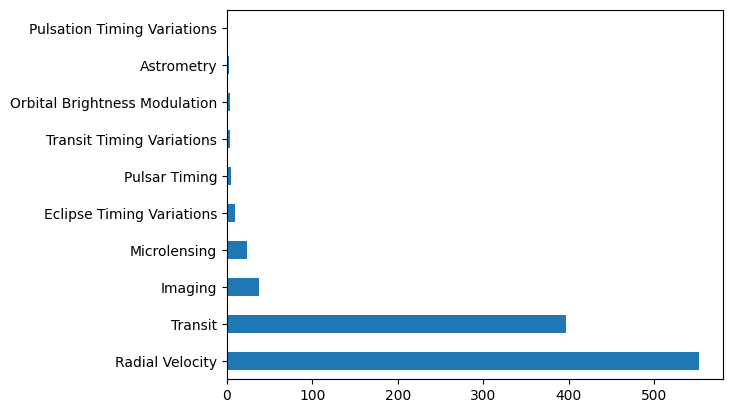

In [39]:
df["method"].value_counts().plot.barh();

#### Sürekli Değişken Özetleri 

In [40]:
df_num = df.select_dtypes(include = ["float64", "int64"])

In [41]:
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [42]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [43]:
df_num["distance"].describe()

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [47]:
print("Ortalama: " + str(df_num["distance"].mean()))
print("Dolu Gözlem Sayısı: " + str(df_num["distance"].count()))
print("Maksimum Değer: " + str(df_num["distance"].max()))
print("Minimum Değer: " + str(df_num["distance"].min()))
print("Medyan: " + str(df_num["distance"].median()))
print("Standart Sapma: " + str(df_num["distance"].std()))

Ortalama: 264.06928217821786
Dolu Gözlem Sayısı: 808
Maksimum Değer: 8500.0
Minimum Değer: 1.35
Medyan: 55.25
Standart Sapma: 733.1164929404422


### Dağılım Grafikleri

### Sütun Grafik ( Barplot)

Elimizdeki kategorik değişkenleri görselleştirmek için kullanılır. 

##### Veri Seti Hikayesi

price: dolar cinsinden fiyat ( 326-18,823)

carat: ağırtlık ( 0.2-5.01)

cut: kalite ( Fair, Good, Very Good, Premium, Ideal)

color: renk (from J(worst) to D(best))

clarity: berraklığı ( I1(worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF(best))

x: length in mm (0-10.74)

y: width in mm (0-58.9)

z: depth in mm (0-31.8)

depth: toplam derinlik yüzdesi = z/mean(x,y) = 2*z/(x+y)(43-79)

table: elmasın en geniş noktasına göre genişliği (43-95)

In [80]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##### Veri Setine Hızlı Bakış 

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [83]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [53]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [55]:
# ordinal tanımlama
from pandas.api.types import CategoricalDtype

In [56]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [58]:
df.cut = df.cut.astype(CategoricalDtype(ordered = True))

In [59]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [60]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

Yukarıda sıralama hatalı geliyor çünkü sırayı tanımlamadık. Şimdi sırayı tanımlayacağız. 

In [84]:
cut_kategoriler = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

In [86]:
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))

In [87]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

In [64]:
#barplot

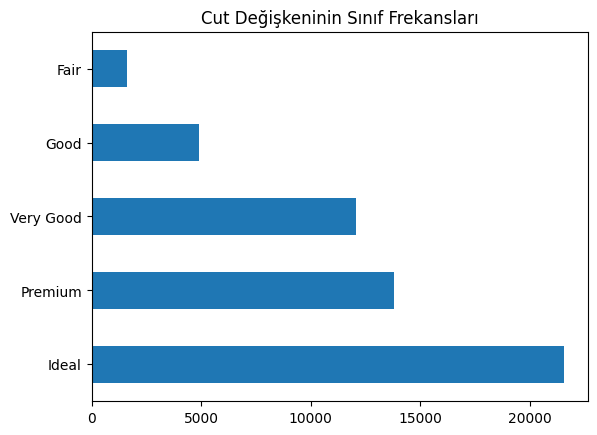

In [88]:
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları");

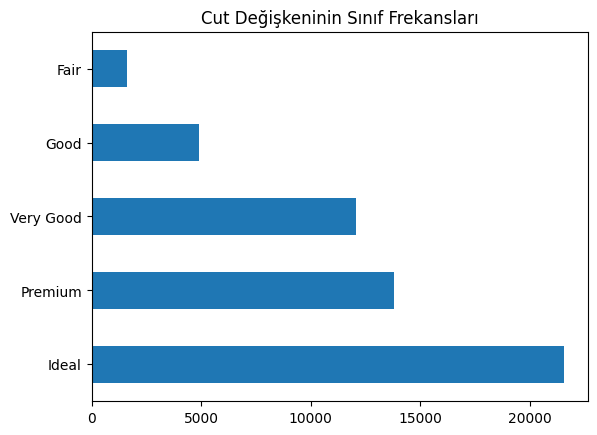

In [66]:
#farklı yazım 

(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Sınıf Frekansları"));

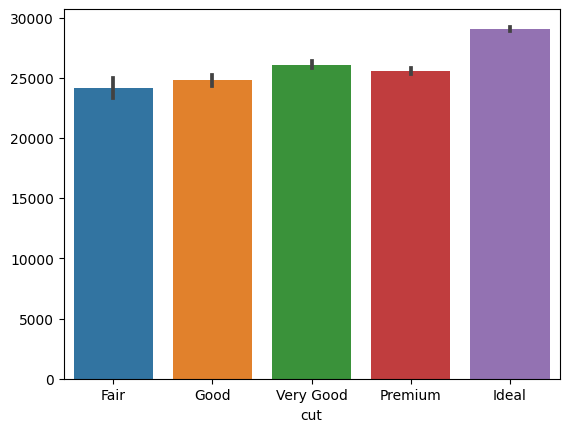

In [67]:
sns.barplot(x = "cut", y = df.cut.index, data = df) ;

### Çaprazlamalar

In [91]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


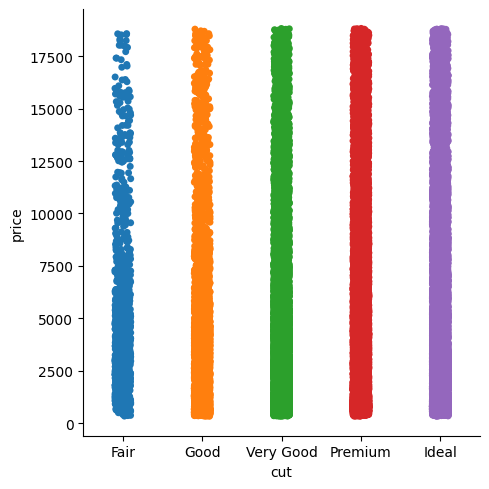

In [92]:
sns.catplot(x = "cut", y = "price" , data = df);

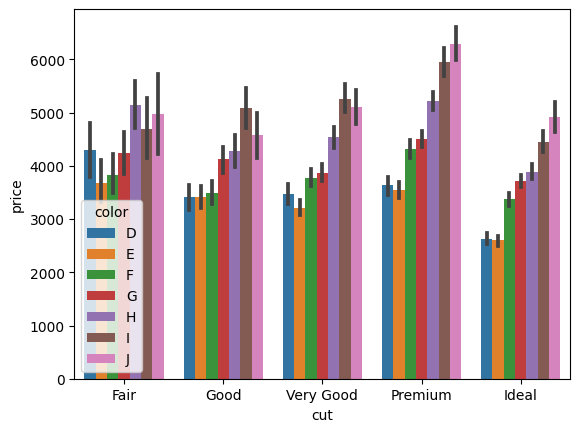

In [93]:
sns.barplot(x = "cut", y = "price" , hue = "color", data = df);

In [95]:
#dogrulama için bakalım

df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

### Histogram Grafikleri

In [96]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


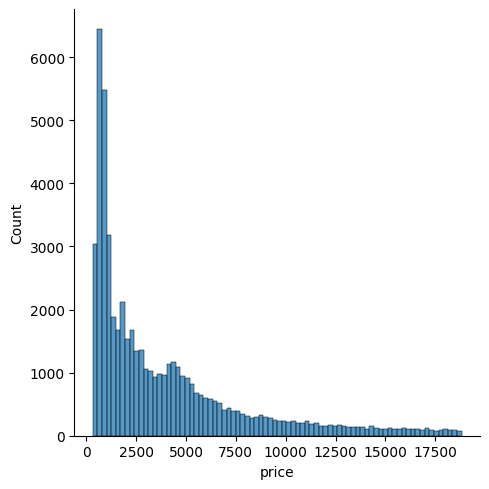

In [99]:
#sayısal değişkenin dağılımı 

sns.displot(df.price, kde = False);

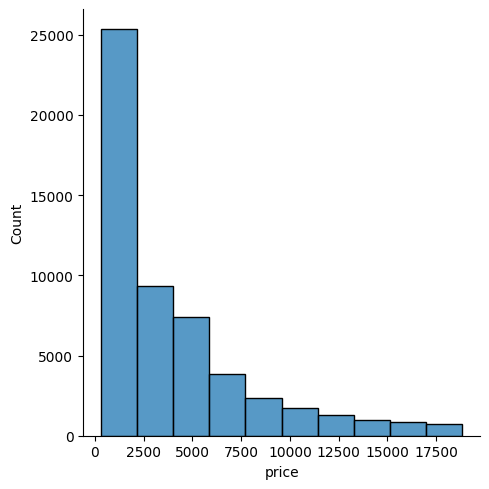

In [102]:
sns.displot(df.price, bins = 10, kde = False);

<Axes: xlabel='price', ylabel='Count'>

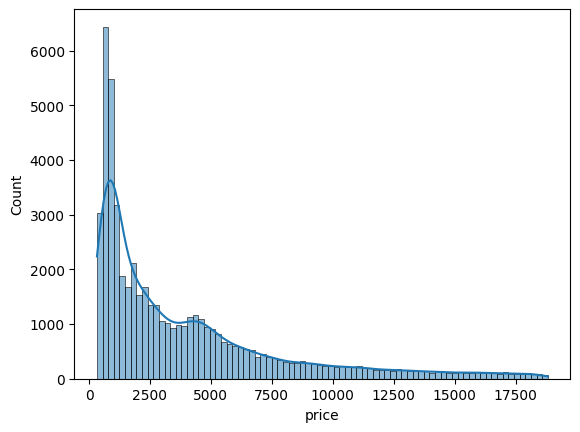

In [110]:
# histogram üzerine yoğunluk grafiği

sns.histplot(df.price, kde=True)

<Axes: xlabel='price', ylabel='Density'>

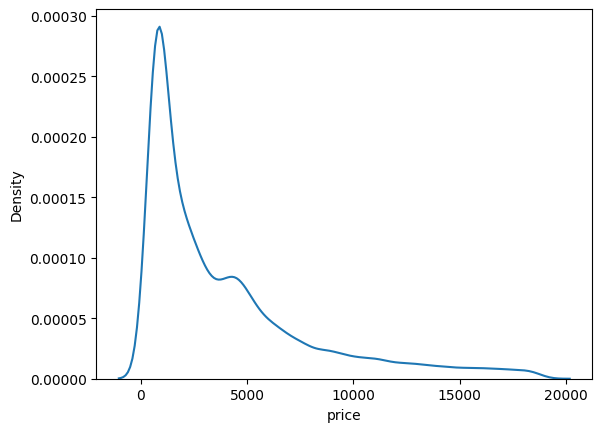

In [112]:
#sadece yoğunluk grafiği 

sns.kdeplot(df.price)

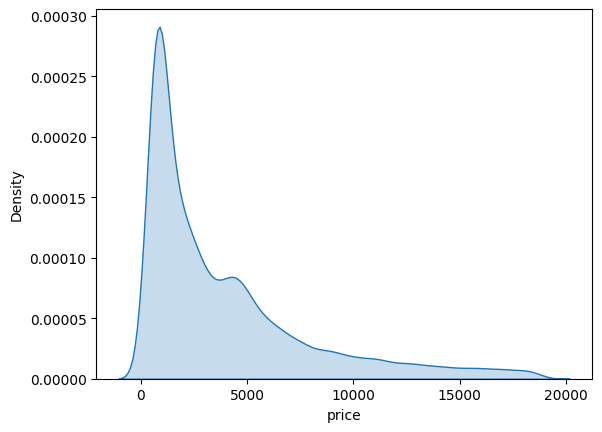

In [115]:
# içi dolu 

sns.kdeplot(df.price, shade = True);

#### Çaprazlamalar 

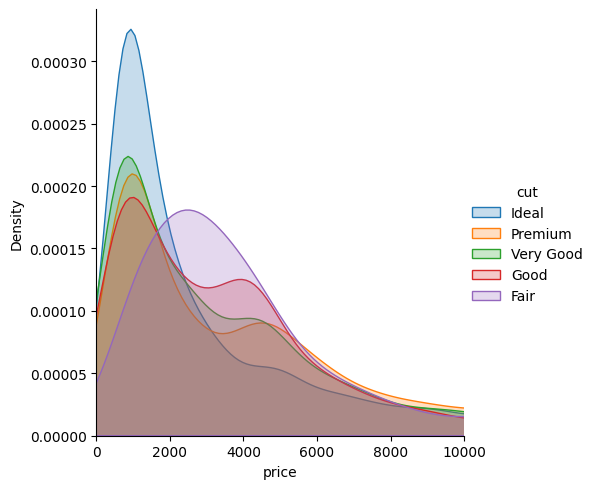

In [120]:
(sns
 .FacetGrid(df,
             hue = "cut",
             height = 5,
             xlim = (0,10000))
 .map(sns.kdeplot,"price", shade = True)
 .add_legend()
);

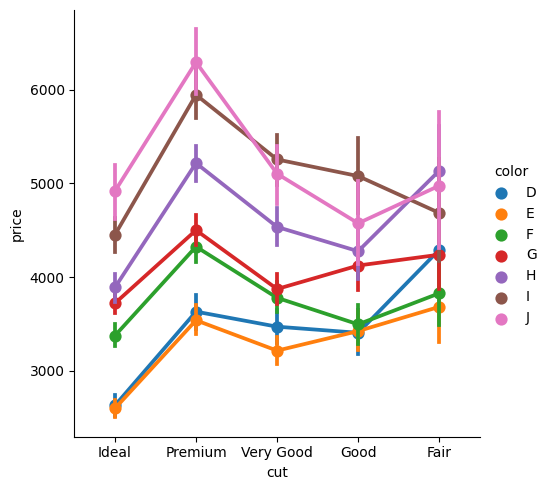

In [121]:
sns.catplot(x= "cut", y = "price", hue = "color", kind = "point", data =df);

### Kutu / Boxplot 

##### Veri Setinin Hikayesi

total_bill: Yemeğin toplam fiyatı ( bahşiş ve vergi dahil)

tip: bahşiş

sex: Ücreti Ödeyen Kişinin Cinsiyeti (0=male, 1=female)

smoker: Grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: Ne zaman? (0=Day, 1=Night)

Size:Grupta kaç kişi var?


In [145]:
import seaborn as sns
tips = sns.load_dataset("tips")
df=tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [123]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [124]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [125]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [126]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [127]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

### Boxplot 

Kartiller aracılığıyla bilgiler sunar. Aykırı gözlemleri de gösterir. 

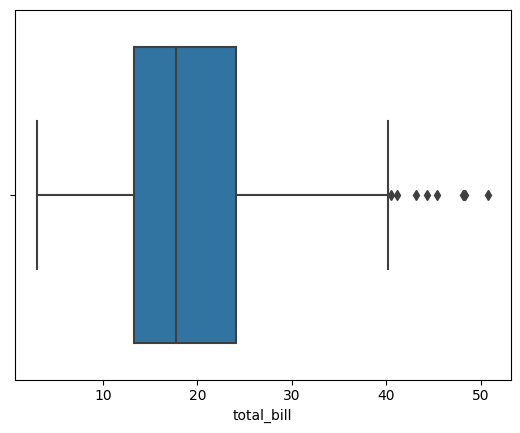

In [129]:
sns.boxplot(x = df["total_bill"]);

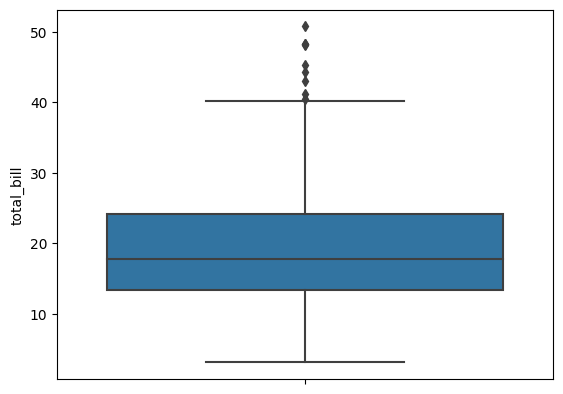

In [133]:
#dikey gozlemlemek için 

sns.boxplot(y = df["total_bill"]);

#### Çaprazlamalar 

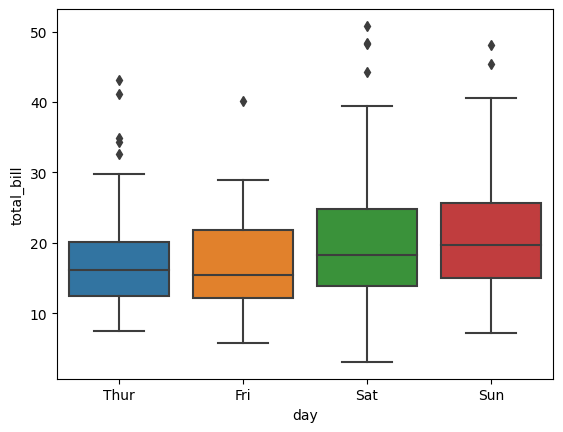

In [134]:
#Hangi Günler daha fazla para kazanılıyor?

sns.boxplot(x = "day", y = "total_bill", data = df);

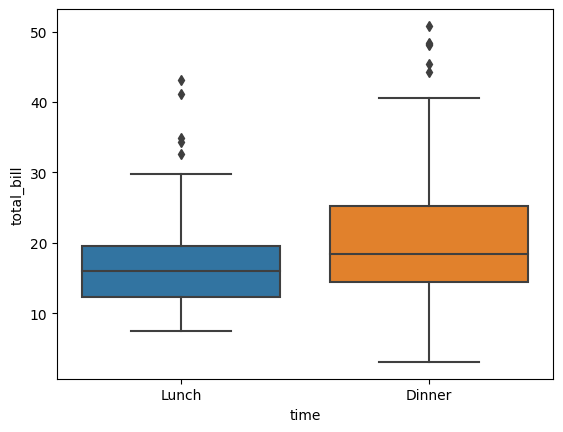

In [135]:
# sabah mı akşam mı daha fazla para kazanılıyor?

sns.boxplot(x = "time", y = "total_bill", data = df);

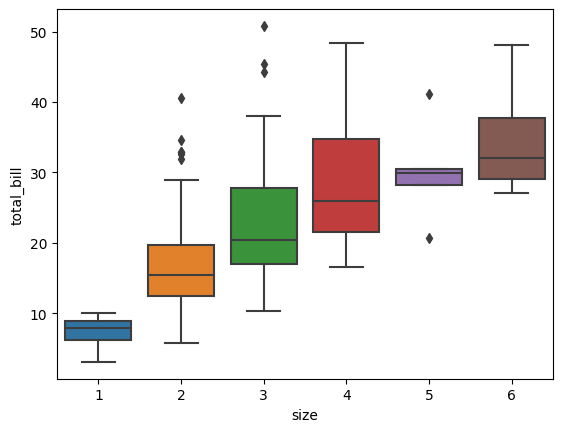

In [136]:
# kisi sayısına göre kazanc

sns.boxplot(x = "size", y = "total_bill", data = df);

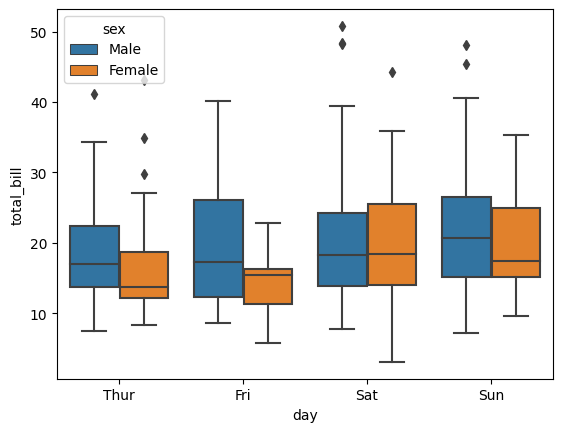

In [138]:
sns.boxplot(x = "day", y = "total_bill", hue = "sex", data = df);

### Violin Grafik 

Kutu ve yoğunluk grafiğinin kesişimi gibidir. 

In [139]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


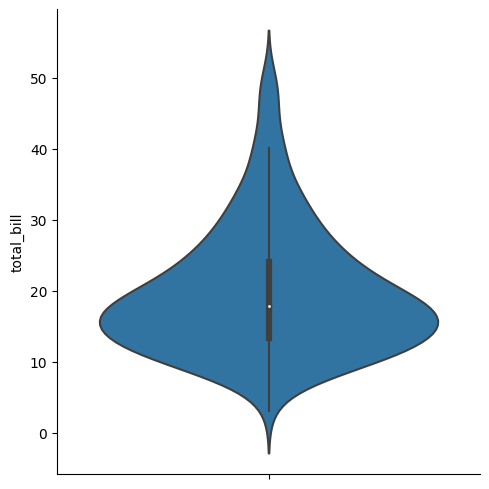

In [142]:
sns.catplot(y = "total_bill", kind = "violin", data = df);

#### Çaprazlamalar 

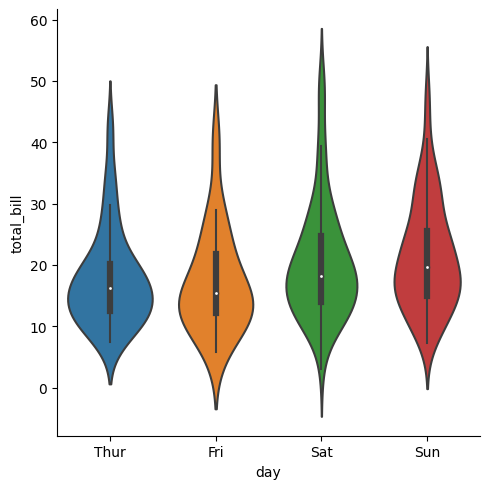

In [143]:
sns.catplot(x = "day", y = "total_bill", kind = "violin", data = df);

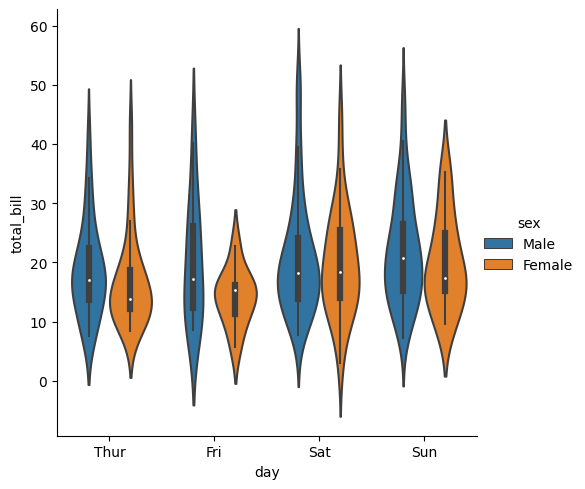

In [144]:
sns.catplot(x = "day", y = "total_bill", hue = "sex",  kind = "violin", data = df);

### Korelasyon Grafikleri 

#### Scatterplot

Aynı anda iki sayısal değişkenin çıkardığı yapıya bakılacak 

##### Veri Setinin Hikayesi

total_bill: Yemeğin toplam fiyatı ( bahşiş ve vergi dahil)

tip: bahşiş

sex: Ücreti Ödeyen Kişinin Cinsiyeti (0=male, 1=female)

smoker: Grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: Ne zaman? (0=Day, 1=Night)

Size:Grupta kaç kişi var?

In [146]:
import seaborn as sns
tips = sns.load_dataset("tips")
df=tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


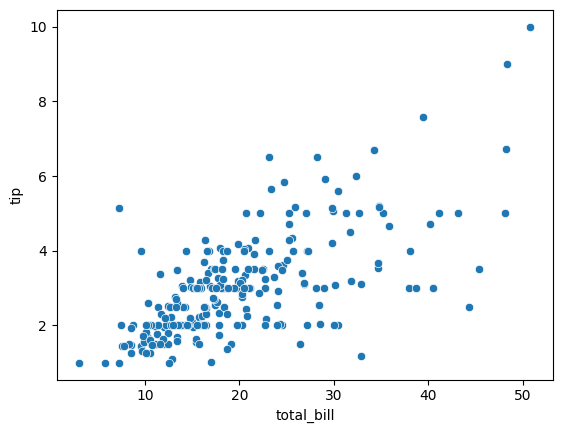

In [147]:
sns.scatterplot(x = "total_bill", y = "tip", data = df);

#### Çaprazlamalar

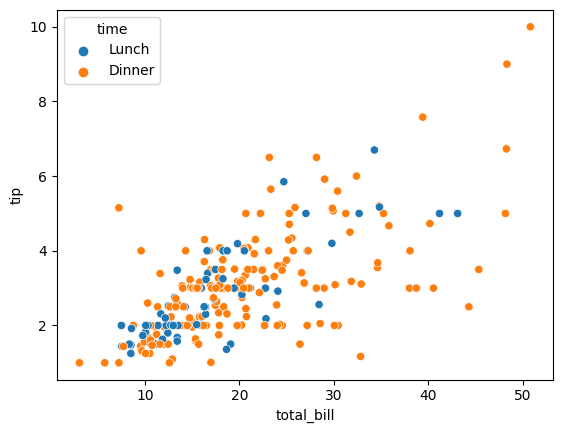

In [148]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", data = df);

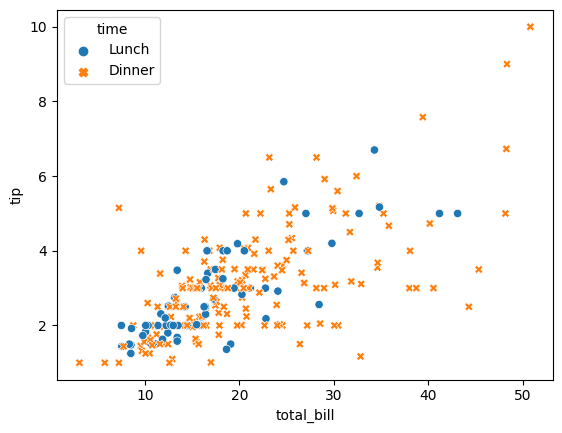

In [150]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", style = "time", data = df);

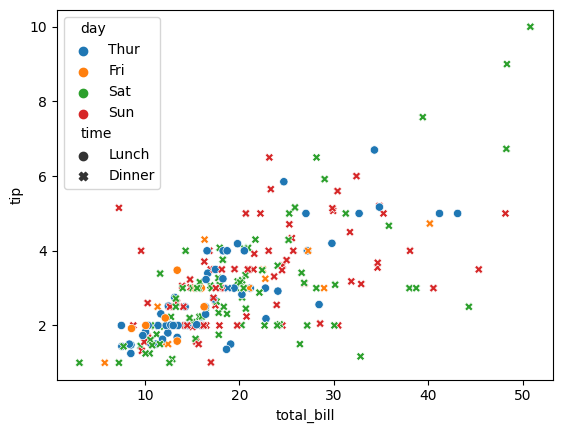

In [151]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "day", style = "time", data = df);

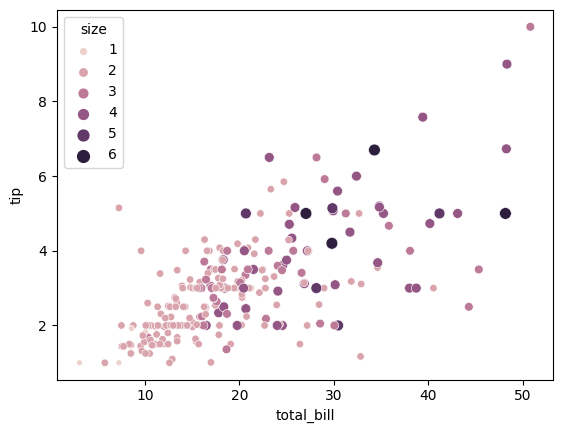

In [153]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "size", size = "size", data = df);

#### Doğrusal İlişkinin Gösterilmesi 

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

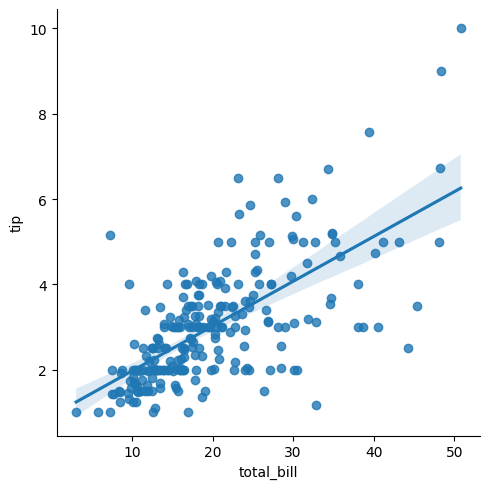

In [155]:
sns.lmplot(x = "total_bill", y = "tip", data = df);

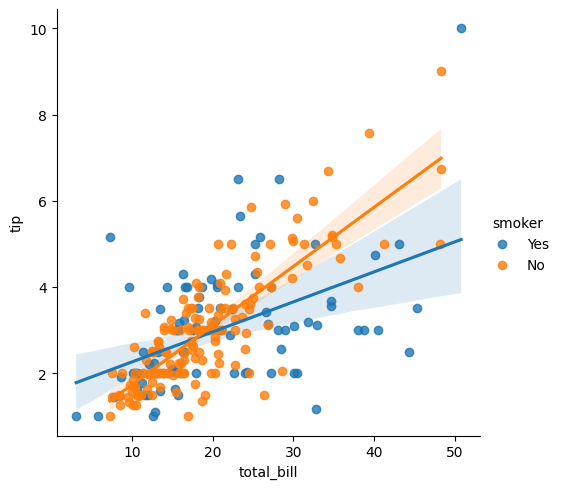

In [156]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", data = df);

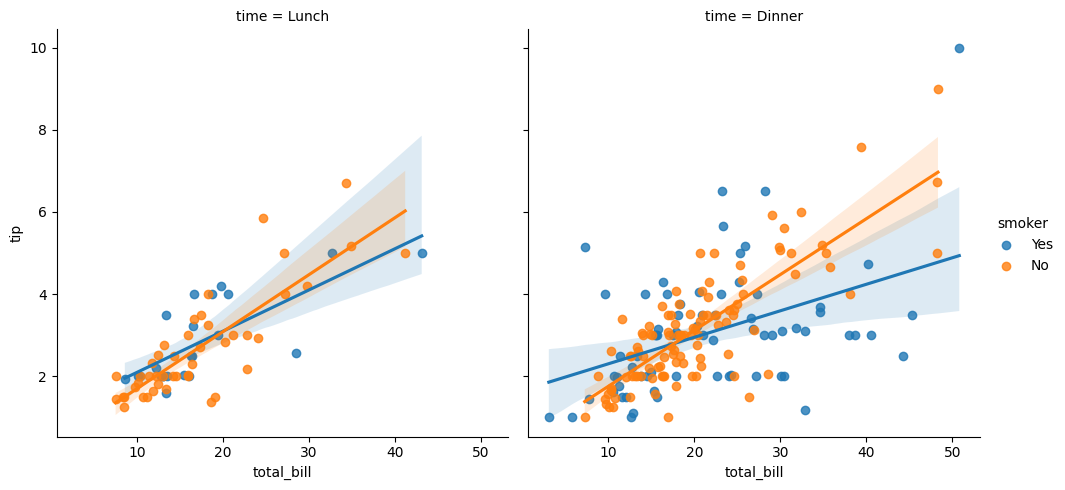

In [157]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time",  data = df);

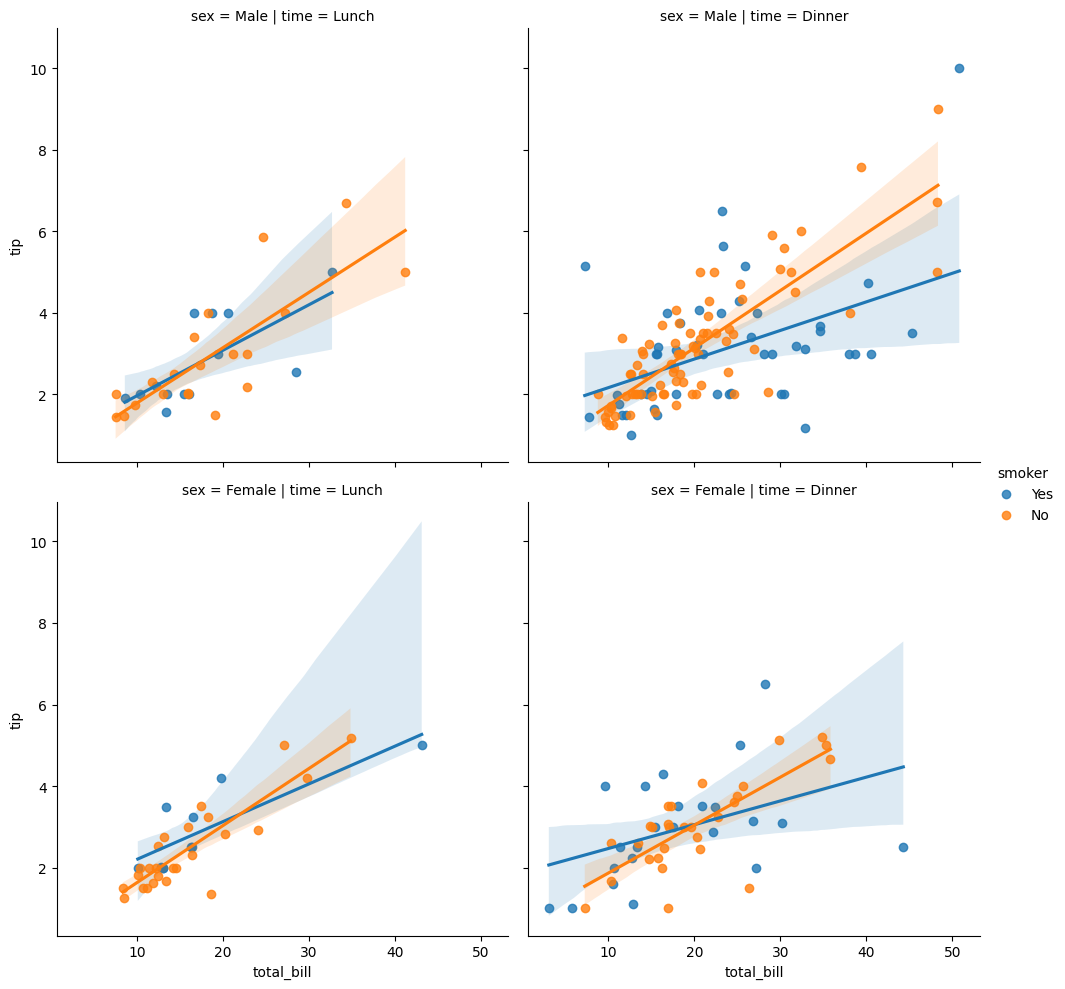

In [158]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", row = "sex",   data = df);

### Scatter Plot Matrisi

In [164]:
import seaborn as sns;
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

# Veri Seti Hikayesi : Çiçek türleri ile ilgili. 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [165]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [166]:
df.shape

(150, 5)

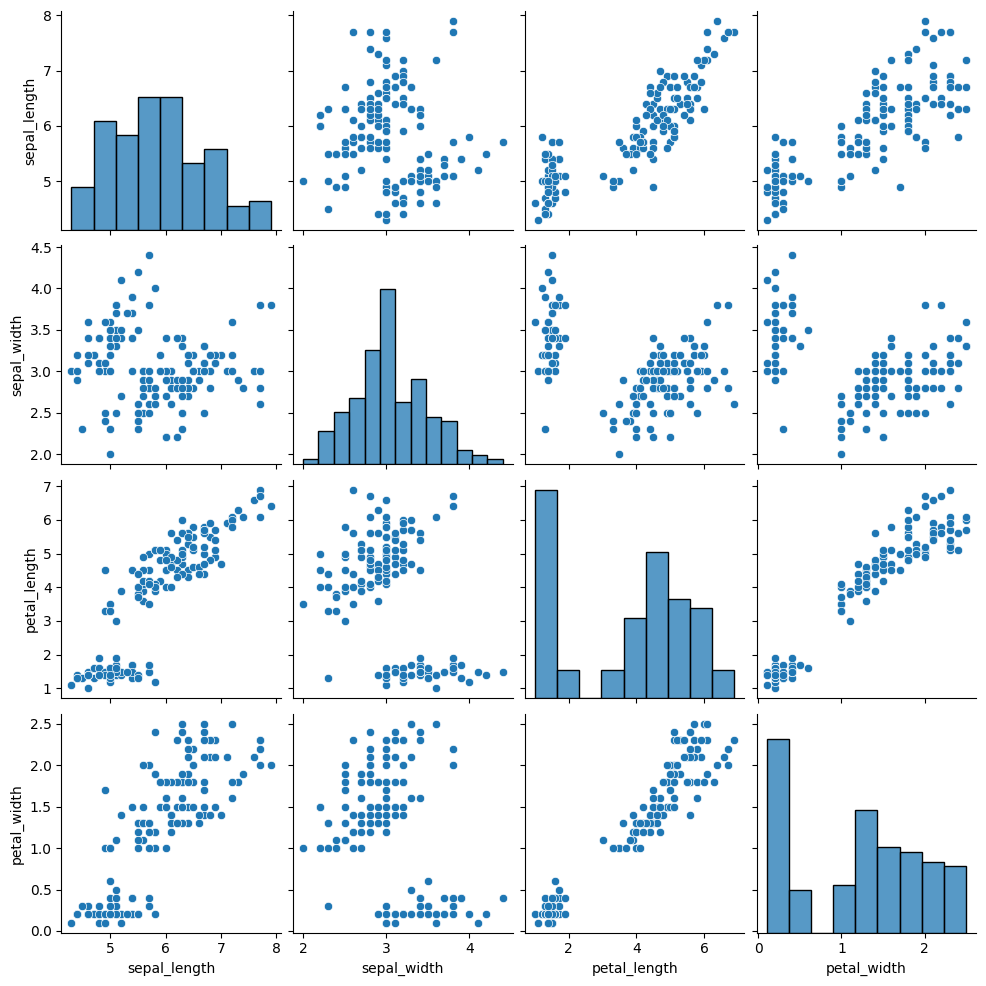

In [168]:
#veri seti içindeki 4 sayısal değişkenin birbirleri arasındaki ilişkiyi gösteren grafik 

sns.pairplot(df);

Oluşturulmuş olan grafik bir toz bulutu şeklindeyse, o iki değişken arasında bir ilişki olmadığını gösterir. 
Gözlem noktaları incelendiğinde birbirinden farklı köşelerde kümeleniyor ise çaprazlamadan kaynaklı durumlar vardır. 

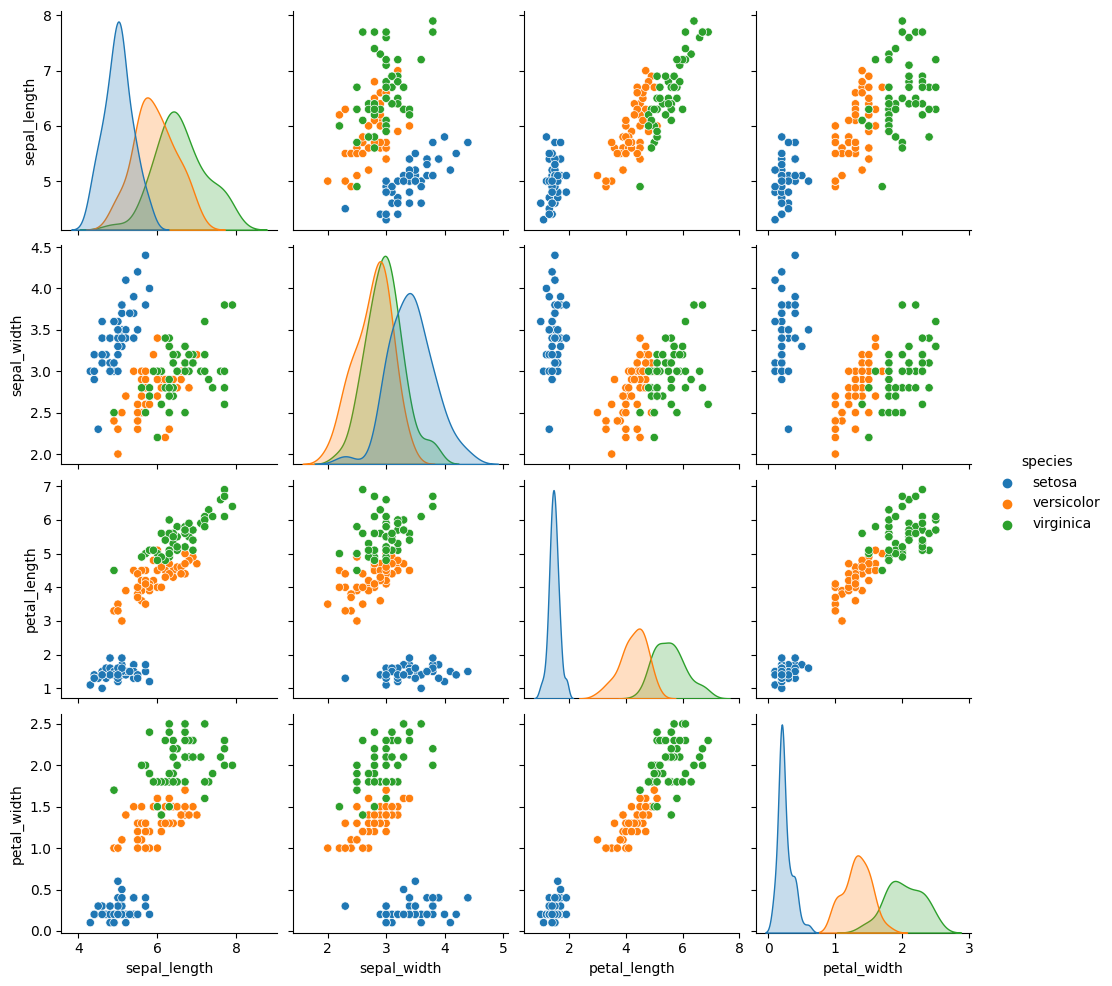

In [169]:
sns.pairplot(df, hue = "species" );

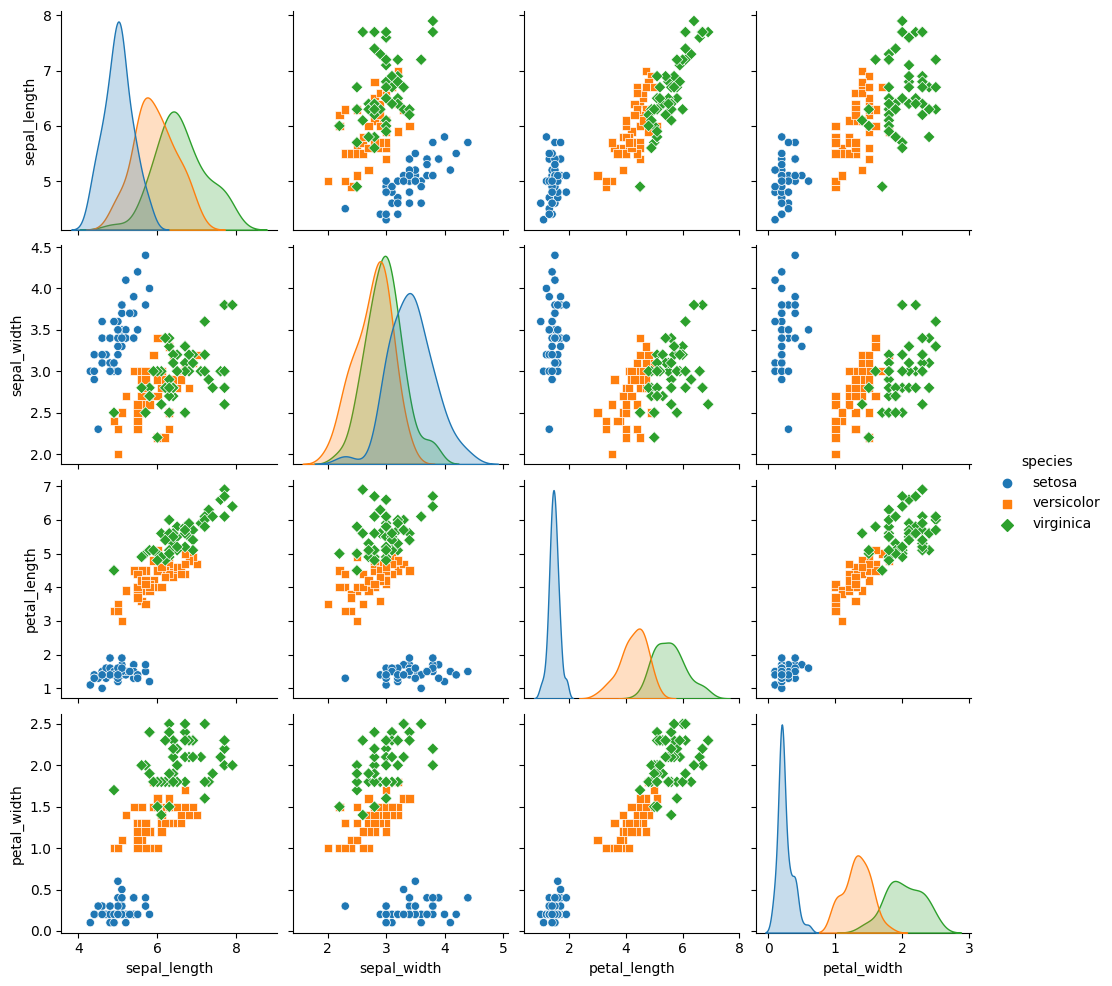

In [171]:
sns.pairplot(df, hue = "species", markers = ["o", "s", "D"]);

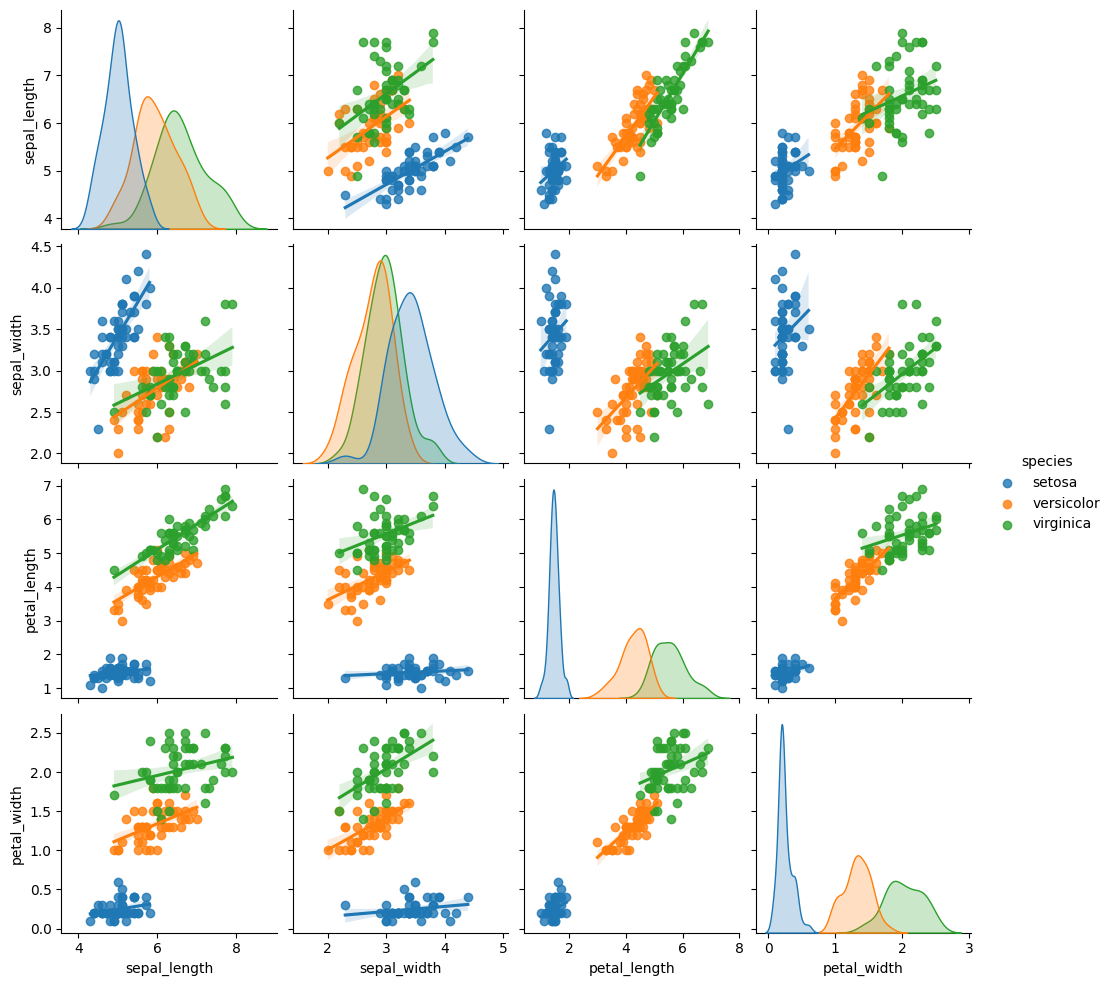

In [172]:
sns.pairplot(df, kind = "reg", hue = "species");

## Isı Haritası / Heat Map

Yıl, ay gibi olayları görmek istediğimizde işe yarar.

#### Veri Seti Hikayesi 

In [175]:
import seaborn as sns
flights = sns.load_dataset("flights")
df = flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [176]:
df.shape

(144, 3)

In [177]:
df["passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [178]:
#dataframe mi öncelikle bir pivot tablo işlemine tabi tutacağız. 

df= df.pivot("month", "year", "passengers");

In [179]:
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


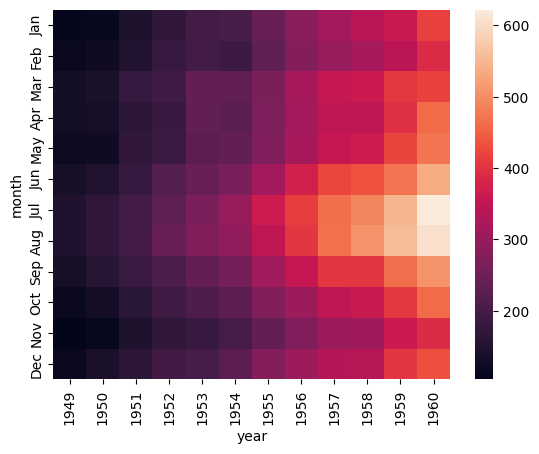

In [180]:
sns.heatmap(df);

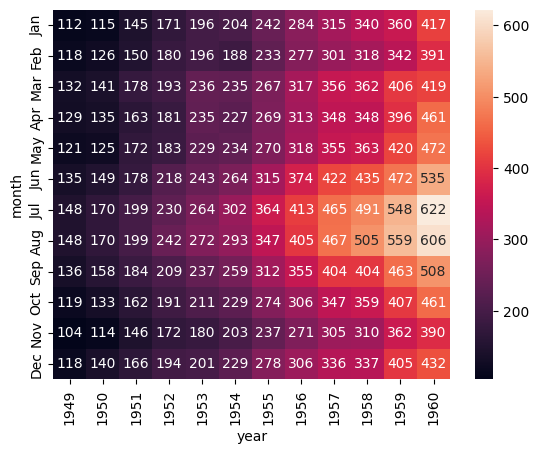

In [181]:
# sayıları üzerine yazmak

sns.heatmap(df, annot = True, fmt = "d");

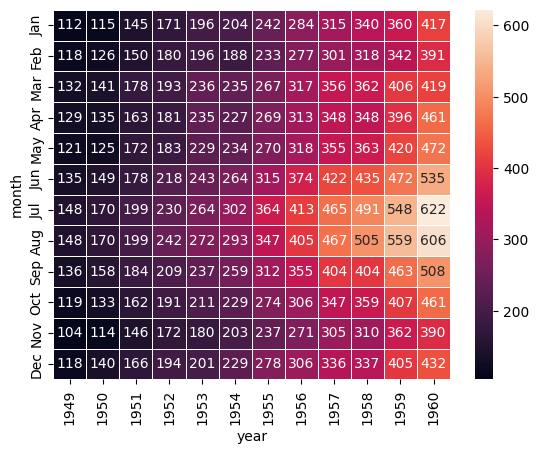

In [182]:
# aralara çizgi koymak 

sns.heatmap(df, annot = True, fmt = "d", linewidths = .5);

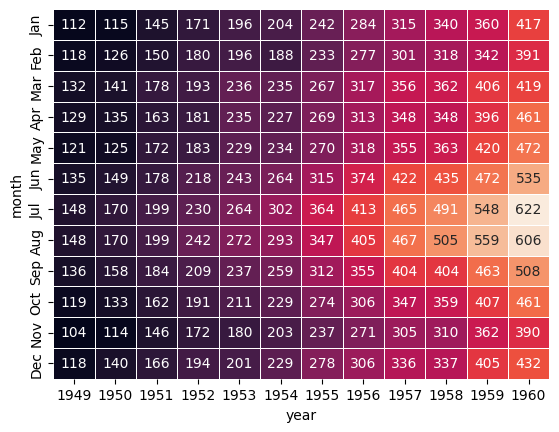

In [184]:
# sağdaki bilgi çubuğunu kaldırmak

sns.heatmap(df, annot = True, fmt = "d", linewidths = .5, cbar = "");

## Çizgi Grafik 

Zamana bağlı değişkenlerin olduğu veri setlerinde ve nesnelerin interneti gibi senaryolarda makinelerin ürettiği verileri görselleştirmek için kullanılır. 

In [185]:
import seaborn as sns
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

#veri seti hikayesi : beyine bağlanan bir cihaz aracılığıyla toplanan verileri içeriyor


,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [186]:
df.shape

(1064, 5)

In [187]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [188]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [189]:
# her bir zaman noktasında eşit sinyal mi var 

df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [190]:
# her birisi tekil mi (evet)

df.groupby("signal").count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


In [191]:
# genel istatistikleri inceleyelim

df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


### Çizgi Grafik Oluşturma ve Çaprazlamalar 

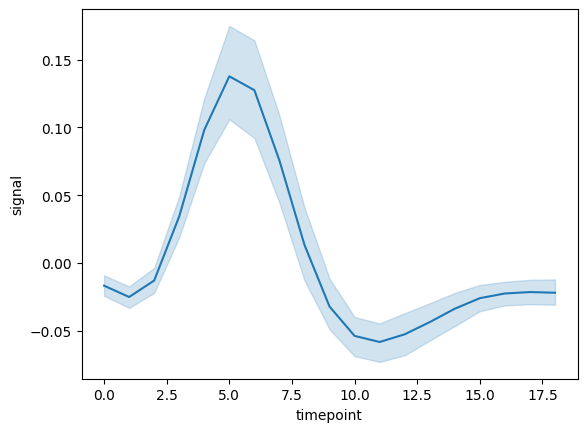

In [192]:
sns.lineplot(x = "timepoint", y = "signal", data = df);

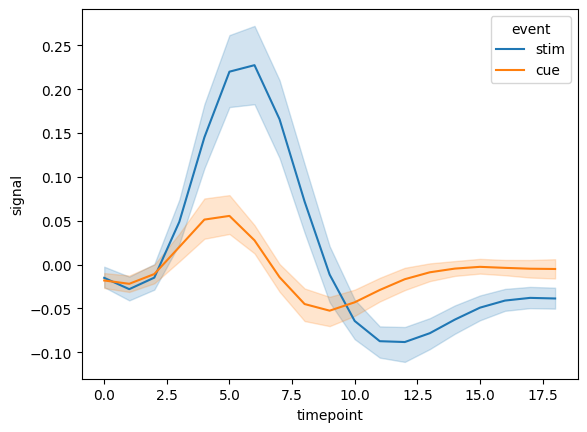

In [194]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", data = df);

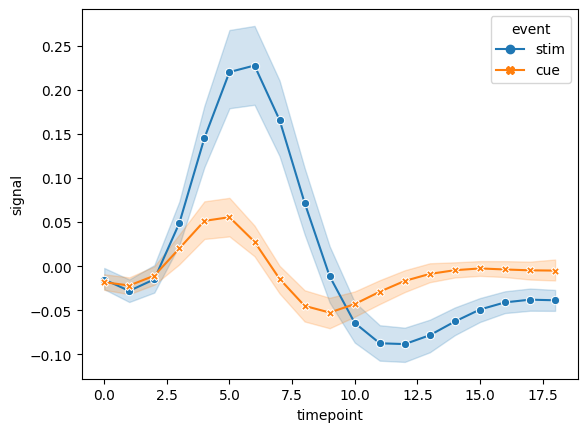

In [195]:
sns.lineplot(x = "timepoint",
             y = "signal",
             hue = "event",
             style = "event",
             markers = True, dashes = False, data = df);

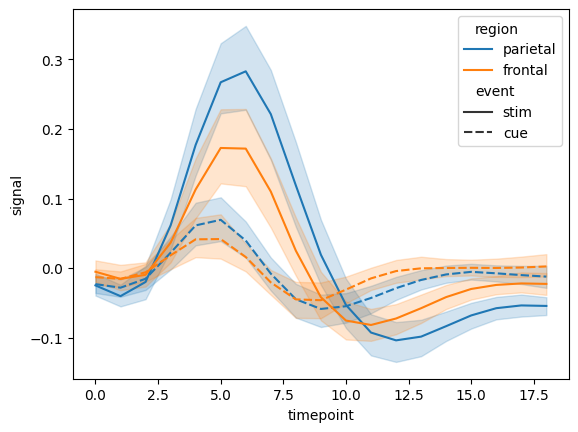

In [197]:
sns.lineplot(x = "timepoint",
             y = "signal",
             hue = "region",
             style = "event",
             data = df);

### Basit Zaman Serisi Grafiği 

In [206]:
!pip install yfinance

import yfinance as yf

#### Veri Seti Hikayesi

Apple'ın borsadaki hisse senedi değerleri, zamana bağlı veri. 

In [207]:
df = yf.download("AAPL", start="2016-01-01", end="2019-08-25")

[*********************100%***********************]  1 of 1 completed


In [208]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.074747,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.471445,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.012117,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.040894,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.157444,283192000


In [209]:
df.shape

(917, 6)

In [210]:
kapanis = df["Close"]

In [215]:
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

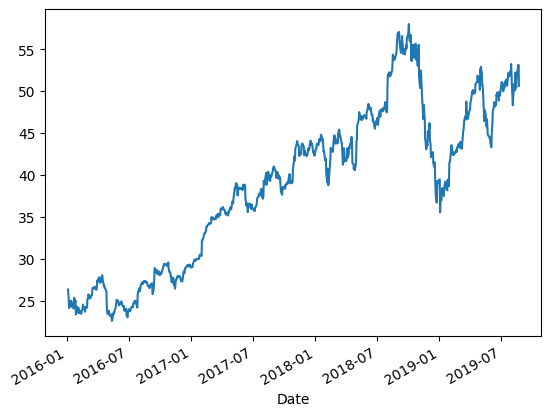

In [216]:
kapanis.plot();

In [214]:
# zaman değeri belirtilmemiş olsaydı şöyle yapılmalıydı. 

kapanis.index = pd.DatetimeIndex(kapanis.index)